# Runtime Range and Return Percentage Analysis

Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df3 = pd.read_csv("Data_created/QiDataFile.csv")
df3.head()

,primary_title,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_name,genres,count,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,time_bucket
0,#Horror,3.0,3092.0,101.0,2015.0,1972.0,NaN,Tara Subkoff,"Crime,Drama,Horror",1,...,0,0,1,0,0,0,0,0,0,91 to 105
1,10 Cloverfield Lane,7.2,260383.0,103.0,2016.0,NaN,NaN,Dan Trachtenberg,"Drama,Horror,Mystery",1,...,0,0,1,0,1,0,0,0,0,91 to 105
2,10 Days in a Madhouse,6.7,1114.0,111.0,2015.0,1960.0,NaN,Timothy Hines,Drama,1,...,0,0,0,0,0,0,0,0,0,106 to 120
3,12 Strong,6.6,50155.0,130.0,2018.0,1972.0,NaN,Nicolai Fuglsig,"Action,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135
4,12 Years a Slave,8.1,577301.0,134.0,2013.0,1969.0,NaN,Steve McQueen,"Biography,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135


In [3]:
df3 = df3.drop(columns='time_bucket')

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2147 non-null   object 
 1   averagerating      2147 non-null   float64
 2   numvotes           2147 non-null   float64
 3   runtime_minutes    2147 non-null   float64
 4   start_year         2147 non-null   float64
 5   birth_year         1462 non-null   float64
 6   death_year         23 non-null     float64
 7   primary_name       2147 non-null   object 
 8   genres             2147 non-null   object 
 9   count              2147 non-null   int64  
 10  production_budget  2147 non-null   float64
 11  domestic_gross     2147 non-null   float64
 12  worldwide_gross    2147 non-null   float64
 13  return_perc        2147 non-null   float64
 14  return_percv2      2147 non-null   float64
 15  Action             2147 non-null   int64  
 16  Adventure          2147 

In [5]:
df3['return_percv2'].describe()

count    2147.000000
mean        2.641324
std        13.568265
min        -1.000000
25%        -0.641474
50%         0.709365
75%         2.700253
max       415.564740
Name: return_percv2, dtype: float64

# Looking into runtime and return percentage

In [6]:
df3['runtime_minutes'].describe()

count    2147.000000
mean      103.897140
std        18.212513
min         5.000000
25%        92.000000
50%       101.000000
75%       113.750000
max       180.000000
Name: runtime_minutes, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

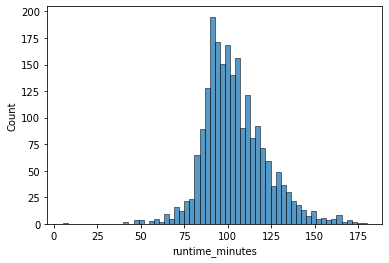

In [7]:
# looking at run time distribution
sns.histplot(x = df3['runtime_minutes'],bins=60)

<AxesSubplot:xlabel='runtime_minutes', ylabel='return_percv2'>

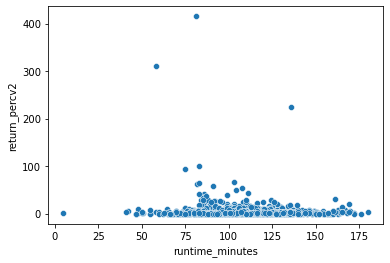

In [8]:
# looking to see a relationship bewteen run time and return percentage, scatterplot, regression plot
sns.scatterplot(x='runtime_minutes', y= 'return_percv2', data = df3 )

<AxesSubplot:xlabel='runtime_minutes', ylabel='return_percv2'>

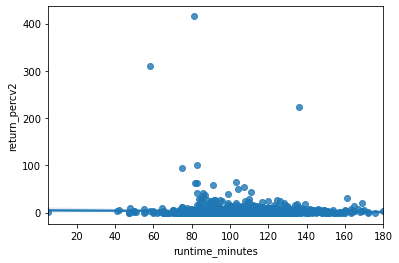

In [9]:
sns.regplot(x='runtime_minutes', y= 'return_percv2', data = df3)

In [10]:
np.corrcoef(df3['runtime_minutes'],df3['return_percv2'])

array([[ 1.       , -0.0267629],
       [-0.0267629,  1.       ]])

There is no correlation between runtime minutes and return percentage.

Binning movie lengths from 0 to 180 minutes, 10 min as the interval to see in what movie length range yields the best return percentage.

In [11]:
# Define the bins and labels for the time buckets
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
labels = [f"{i+1} to {i+10}" for i in range(0, 170, 10)]

# Use pd.cut() to assign each value in the runtime_minutes column to a time bucket
df3['movie_length_range'] = pd.cut(df3['runtime_minutes'], bins=bins[:-1], labels=labels)

In [12]:
df3['movie_length_range'].value_counts()

91 to 100     555
101 to 110    480
81 to 90      358
111 to 120    304
121 to 130    166
131 to 140     96
71 to 80       65
141 to 150     43
61 to 70       23
151 to 160     18
161 to 170     16
51 to 60        9
41 to 50        9
1 to 10         1
31 to 40        0
21 to 30        0
11 to 20        0
Name: movie_length_range, dtype: int64

In [13]:
# groupby movie length ranges, sort by mean return percentage for each range.
df3.groupby('movie_length_range')['return_percv2'].mean().sort_values()

movie_length_range
151 to 160     0.981672
61 to 70       1.318967
1 to 10        1.698677
111 to 120     1.796718
91 to 100      1.940671
101 to 110     2.141688
41 to 50       2.363402
141 to 150     2.431480
121 to 130     2.574087
71 to 80       2.668574
81 to 90       3.705376
131 to 140     4.951974
161 to 170     6.947113
51 to 60      36.442675
11 to 20            NaN
21 to 30            NaN
31 to 40            NaN
Name: return_percv2, dtype: float64

In [14]:
# groupby movie length ranges, sort by median return percentage for each range.
df3.groupby('movie_length_range')['return_percv2'].median().sort_values()

movie_length_range
81 to 90     -0.173286
71 to 80     -0.004459
61 to 70      0.000776
151 to 160    0.298834
91 to 100     0.413127
111 to 120    0.812812
101 to 110    0.906925
51 to 60      1.367353
121 to 130    1.401752
131 to 140    1.580755
1 to 10       1.698677
141 to 150    2.037037
41 to 50      2.229761
161 to 170    3.750068
11 to 20           NaN
21 to 30           NaN
31 to 40           NaN
Name: return_percv2, dtype: float64

In [15]:
df3.to_csv('Data_created/df3.csv')

Open Genres by median ROI created by Sean, to make visualizations.

In [16]:
df5 = pd.read_csv('Data_created/genre_means_data.csv')

In [17]:
df5['median_ROI'] = df5['mean_ROI']/100
df5.head()

,Genre,mean_ROI,median_ROI
0,Animation,176.281140,1.762811
1,Adventure,137.240837,1.372408
2,Sci-Fi,125.843689,1.258437
3,Mystery,107.574875,1.075749
4,Comedy,104.540803,1.045408


In [18]:
df5.to_csv('Data_created/genre_medianROI_data.csv')